In [8]:
from easing import easing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Tabel of contents
* [Moving points](#moving_points)
* [Points trajectory](#points_trajectory)


## Moving points <a class="anchor" id="moving_points"></a>

In [9]:
eased_list = []
anim_type = []
feats_kws = []

fpt=30

#### No_ease() method on point

In [10]:
# Create a new Eased instance with point moving vertically
data_df = pd.DataFrame(np.array([[0, 0],[0, 4]]))
eased_data = easing.Eased(data_df, in_t=[0,1], wrap=True)

# Apply no ease
eased_data.no_ease(fpt=fpt)

# Append to lists
feats_kws.append({'color':matplotlib_colors[0]})
eased_list.append(eased_data)
anim_type.append('points')

#### Power_ease() method on points

In [11]:
# Create five Eased instances, with different exponents for the power smoothing [1, 2, 3 and 4]. 
for i in range(4):
    
    # Create a new Eased instance with point moving vertically
    data_df = pd.DataFrame(np.array([[1 + i, 0],[1 + i, 4]]))
    eased_data = easing.Eased(data_df, in_t=[0,1], wrap=True)
    
    # Apply power easing
    eased_data.power_ease(n=i+1, fpt=fpt)
    
    # Append to lists
    feats_kws.append({'color':matplotlib_colors[i+1]})
    eased_list.append(eased_data)
    anim_type.append('points')

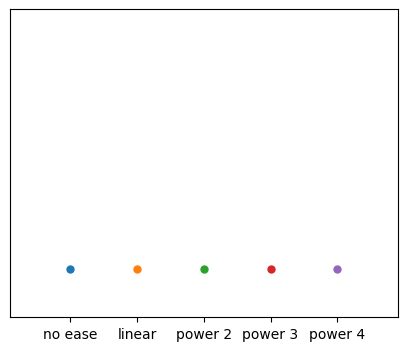

In [12]:
# Create animation
easing.animation2d(eased_list, anim_type, duration=1.0, 
                   feats_kws=feats_kws,
                   ax_kws={'xlim':(-0.9, 4.9), 'ylim':(-0.9, 4.9), 'yticks':[], 
                           'xticks':[0,1,2,3,4],'xticklabels':["no ease", "linear", "power 2", "power 3", "power 4"]}, 
                   #destination='media/easing_powers.gif',
                   figsize=(5,4),
                   )

## Points trajectory <a class="anchor" id="points_trajectory"></a>

In [13]:
eased_list = []
anim_type = []
feats_kws = []

fpt = 30

#### Vertical line

In [14]:
# Create a new Eased instance with a vertical line moving horizontally
line_df = pd.DataFrame(np.array([[0, 0, 0, 1], [1, 0, 1, 1]]))
eased_line = easing.Eased(line_df, wrap=False)

# Apply linear easing, as it will navigate at constant speed through the x-axis (time)
eased_line.power_ease(n=1, fpt=fpt*2)

# Append to lists
feats_kws.append({'color': 'k'})
eased_list.append(eased_line)
anim_type.append('line')

#### Trajectory curves

In [15]:
# Create function to extract the x and y coordinates of the trajectory curves
def get_curve_data(eased_object, frames):
    curve_data = np.empty_like(eased_object.eased)
    curve_data[:, 1] = eased_object.eased[:, 0]
    curve_data[:, 0] = np.linspace(0, 1, frames)
    return curve_data

In [22]:
# Create new Eased instance, with no easing applied
data_df = pd.DataFrame(np.array([[0.0, 1.0],[1.0, 1.0]]))
eased_object = easing.Eased(data_df, in_t=[0,1], wrap=True)
eased_object.no_ease(fpt=fpt)

# Extract trajectory coordinates
curve_data = get_curve_data(eased_object, frames=fpt*2)


### Static curve ###
# Flatten and stack the keyframes (both keyframes are the same, as the curve is static)
curve_flat_data = curve_data.reshape(1, -1)
curve_flat_data = np.vstack([curve_flat_data, curve_flat_data])

# Create a new Eased instance (no ease, as the curve is simply static)
curve_eased = easing.Eased(curve_flat_data, wrap=False)
curve_eased.no_ease(fpt=60)

# Append to lists
feats_kws.append({'color': matplotlib_colors[0]})
eased_list.append(curve_eased)
anim_type.append('line') 


### Moving marker ###
# Create a new Eased instance (assign .eased property directly from the data in curve_data)
marker_eased = easing.Eased(curve_data, wrap=False)
marker_eased.eased = curve_data
marker_eased.n_frames = fpt*2
marker_eased.n_steps = fpt*2

# Append to lists
feats_kws.append({'color': matplotlib_colors[0]})
eased_list.append(marker_eased)
anim_type.append('points')

In [23]:
# Create five Eased instances, with different exponents for the power exponents [1, 2, 3 and 4].
for i in range(4):
    
    # Create new Eased instance, with power easing applied
    data_df = pd.DataFrame(np.array([[0.0, 1.0],[1.0, 1.0]]))
    eased_object = easing.Eased(data_df, in_t=[0,1], wrap=True)
    eased_object.power_ease(n=i+1, fpt=fpt)
    
    # Extract trajectory coordinates
    curve_data = get_curve_data(eased_object, frames=fpt*2)

    
    ### Static line ###
    
    # Flatten and stack the keyframes (both keyframes are the same, as the curve is static)
    curve_flat_data = curve_data.reshape(1, -1)
    curve_flat_data = np.vstack([curve_flat_data, curve_flat_data])
    
    # Create a new Eased instance (no ease, as the curve is simply static)
    curve_eased = easing.Eased(curve_flat_data, wrap=False)
    curve_eased.no_ease(fpt=60)
    
    # Append to lists
    feats_kws.append({'color': matplotlib_colors[i+1]})
    eased_list.append(curve_eased)
    anim_type.append('line') 
    
    
    ### Moving marker ###
    # Create a new Eased instance (assign .eased property directly from the data in curve_data)
    marker_eased = easing.Eased(curve_data, wrap=False)
    marker_eased.eased = curve_data
    marker_eased.n_frames = fpt*2
    marker_eased.n_steps = fpt*2
    
    # Append to lists
    feats_kws.append({'color': matplotlib_colors[i+1]})
    eased_list.append(marker_eased)
    anim_type.append('points')

MovieWriter imagemagick unavailable; using Pillow instead.


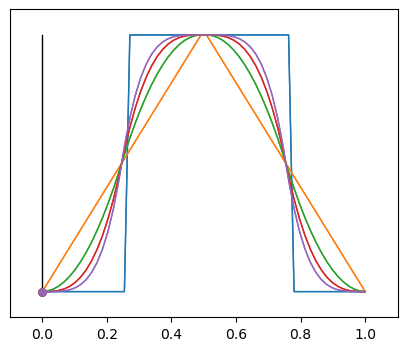

In [26]:
# Create animation
easing.animation2d(eased_list, anim_type, duration=2.0, 
                   feats_kws=feats_kws,
                   ax_kws={'xlim':(-0.1, 1.1), 'ylim':(-0.1, 1.1), 'yticks':[]},
                   destination='media/easing_travels.gif',
                   figsize=(5,4),
                   )

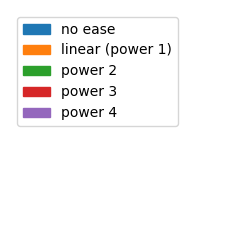

In [25]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


color_labels = ["no ease", "linear (power 1)", "power 2", "power 3", "power 4"]

# Create a list of patches
patches = [mpatches.Patch(color=matplotlib_colors[i], label=label) for i, label in enumerate(color_labels)]

# Create a legend with the patches
fig, ax = plt.subplots(figsize=(3, 3))
legend = plt.legend(handles=patches, loc='upper left')

# Hide the axes
ax.axis('off')

plt.savefig('media/easing_legend.png', bbox_inches='tight')
plt.show()
